In [11]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

c:\Users\CRIZMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_13544\1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 407k/407k [00:00<00:00, 560kB/s]


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

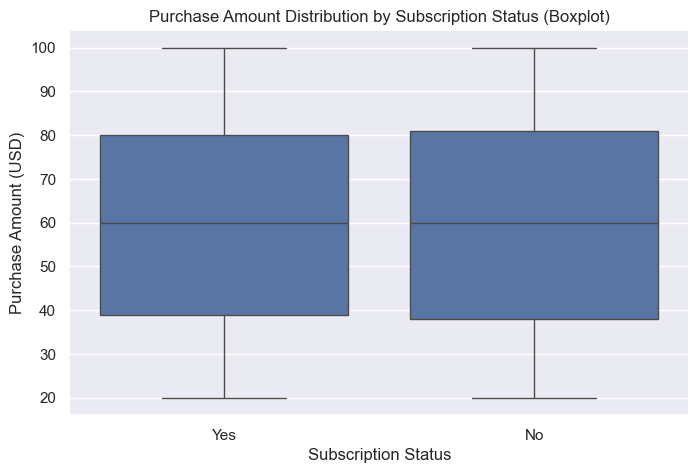

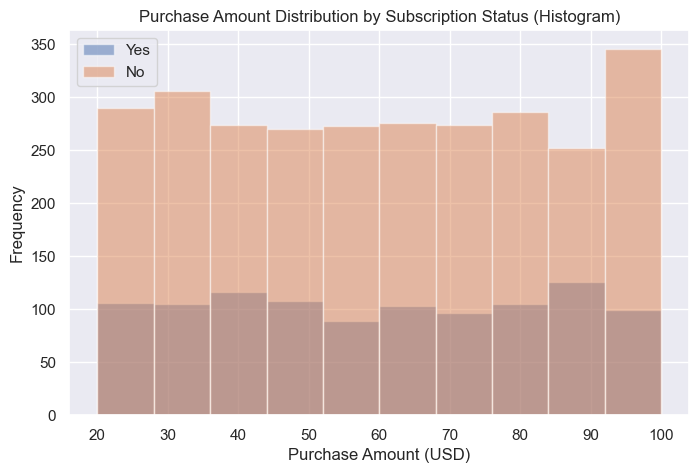

0
Empty DataFrame
Columns: [Customer ID, Purchase Amount (USD), Subscription Status]
Index: []


In [ ]:
#  -------Question 1--------- #
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Subscription Status", y="Purchase Amount (USD)")
plt.title("Purchase Amount Distribution by Subscription Status (Boxplot)")
plt.show()

plt.figure(figsize=(8, 5))
for status in df["Subscription Status"].unique():
    subset = df[df["Subscription Status"] == status]
    plt.hist(subset["Purchase Amount (USD)"], bins=10, alpha=0.5, label=status)

plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.title("Purchase Amount Distribution by Subscription Status (Histogram)")
plt.legend()
plt.show()

Q1 = df["Purchase Amount (USD)"].quantile(0.25)
Q3 = df["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Purchase Amount (USD)"] < Q1 - 1.5 * IQR) |
              (df["Purchase Amount (USD)"] > Q3 + 1.5 * IQR)]

print(len(outliers))
print(outliers[["Customer ID", "Purchase Amount (USD)", "Subscription Status"]])


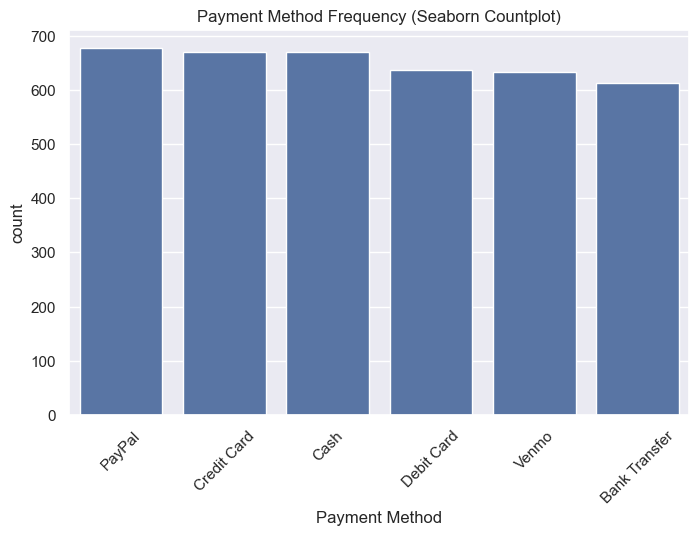

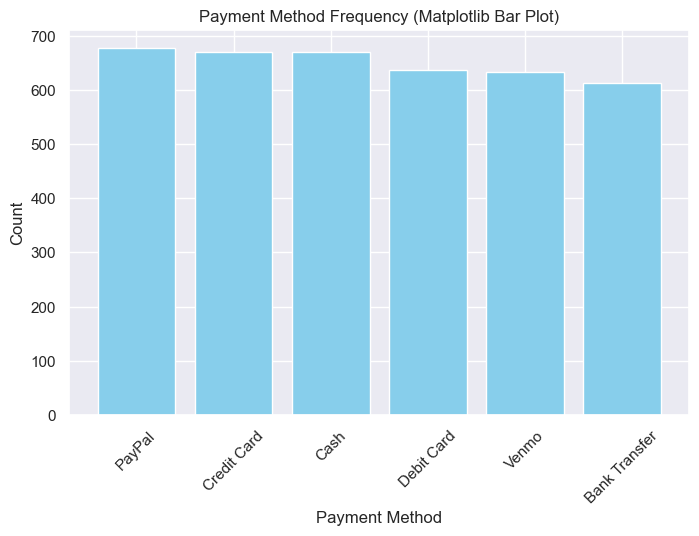

Payment Method frequency from highest to lowest:
Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


In [ ]:
#  -------Question 2--------- #


payment_counts = df["Payment Method"].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Payment Method", order=payment_counts.index)
plt.title("Payment Method Frequency (Seaborn Countplot)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(payment_counts.index, payment_counts.values, color="skyblue")
plt.title("Payment Method Frequency (Matplotlib Bar Plot)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print("Payment Method frequency from highest to lowest:")
print(payment_counts)


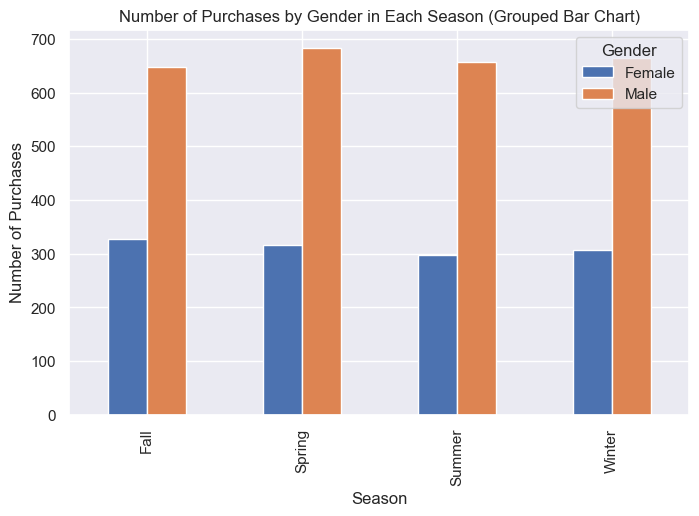

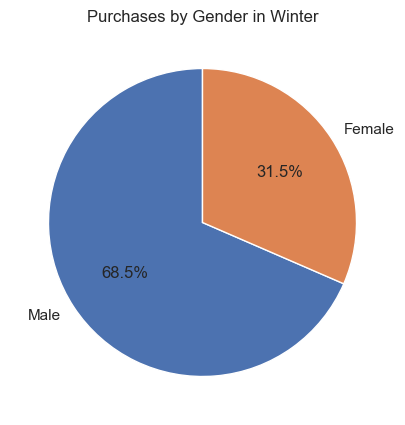

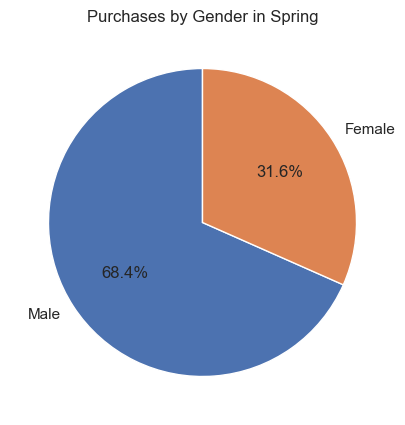

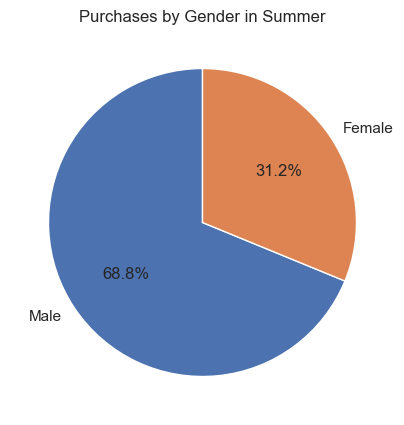

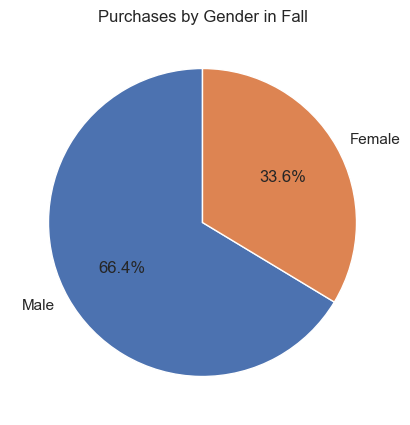

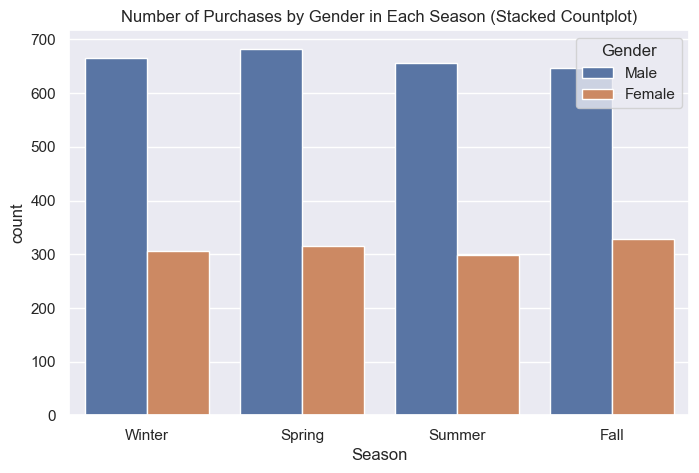

In [16]:
#  -------Question 3--------- #
gender_season_counts = df.groupby(["Season", "Gender"]).size().unstack()

gender_season_counts.plot(kind="bar", figsize=(8, 5))
plt.title("Number of Purchases by Gender in Each Season (Grouped Bar Chart)")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.legend(title="Gender")
plt.show()

for season in df["Season"].unique():
    season_data = df[df["Season"] == season]["Gender"].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(season_data, labels=season_data.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Purchases by Gender in {season}")
    plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Season", hue="Gender")
plt.title("Number of Purchases by Gender in Each Season (Stacked Countplot)")
plt.show()


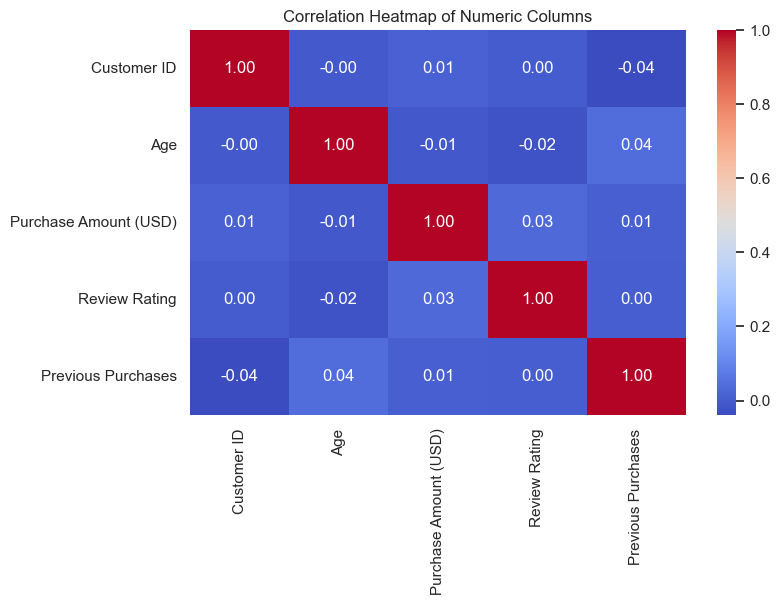

Correlation with Purchase Amount (USD):
Customer ID              0.011048
Age                     -0.010424
Purchase Amount (USD)    1.000000
Review Rating            0.030776
Previous Purchases       0.008063
Name: Purchase Amount (USD), dtype: float64


In [17]:
#  -------Question 4--------- #

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8, 5))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


print("Correlation with Purchase Amount (USD):")
print(corr_matrix["Purchase Amount (USD)"])


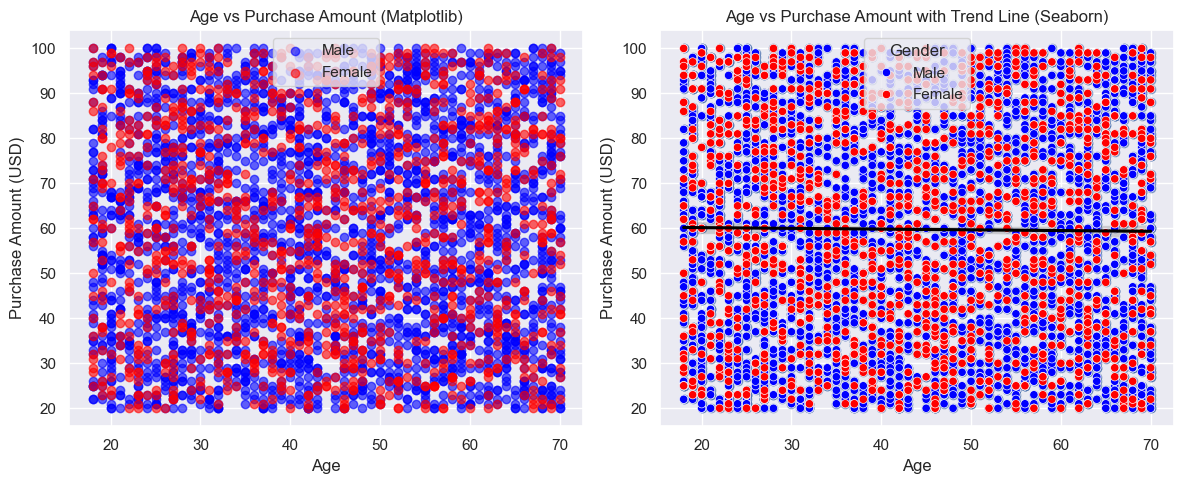

In [18]:
#  -------Question 5--------- #

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
genders = df["Gender"].unique()
colors = {"Male": "blue", "Female": "red"}

for gender in genders:
    subset = df[df["Gender"] == gender]
    plt.scatter(subset["Age"], subset["Purchase Amount (USD)"], 
                label=gender, alpha=0.6, color=colors[gender])

plt.title("Age vs Purchase Amount (Matplotlib)")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.legend()

plt.subplot(1, 2, 2)
sns.regplot(data=df, x="Age", y="Purchase Amount (USD)", 
            scatter_kws={"alpha": 0.6}, line_kws={"color": "black"})
sns.scatterplot(data=df, x="Age", y="Purchase Amount (USD)", hue="Gender", palette=colors)
plt.title("Age vs Purchase Amount with Trend Line (Seaborn)")

plt.tight_layout()
plt.show()


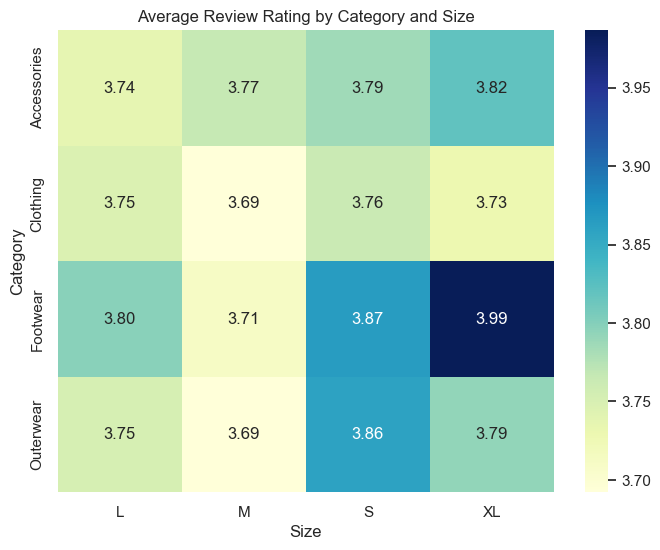

In [ ]:
#  -------Question 6--------- #
pivot_table = df.pivot_table(
    index='Category',        
    columns='Size',           
    values='Review Rating',   
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Review Rating by Category and Size')
plt.show()


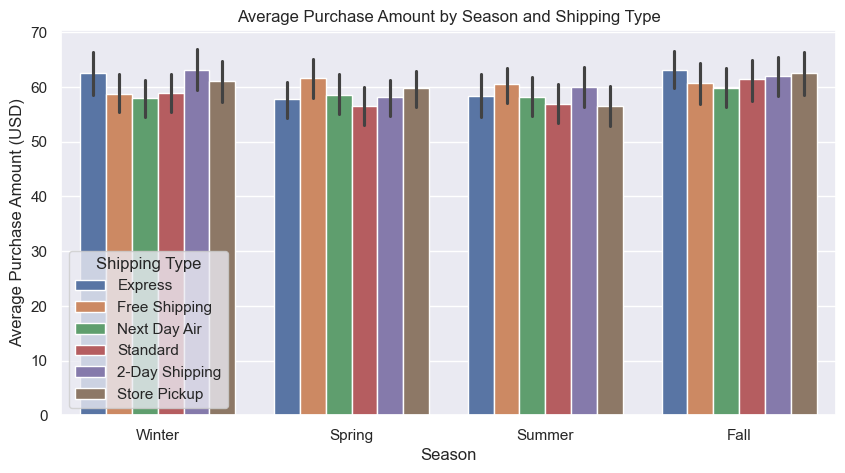

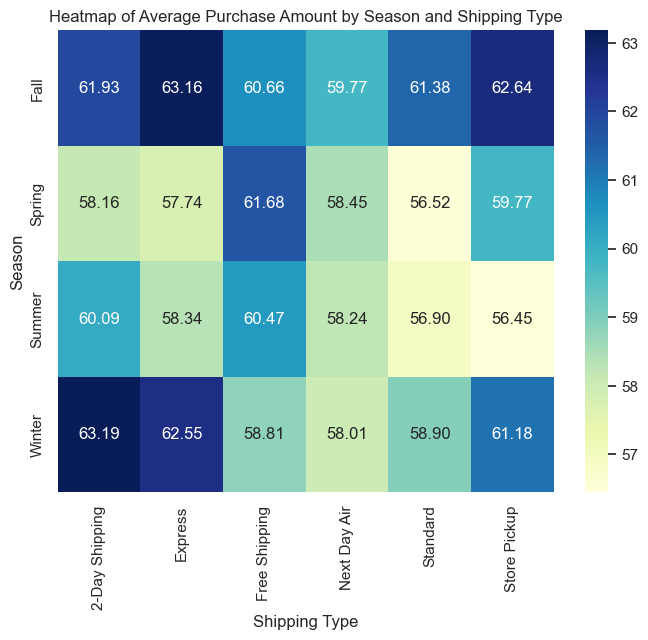

In [23]:
#  -------Question 7--------- #
pivot_data = df.pivot_table(
    index='Season',
    columns='Shipping Type',
    values='Purchase Amount (USD)',
    aggfunc='mean'
)
# -------- Grouped Bar Chart --------

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)', hue='Shipping Type', estimator='mean')
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Season')
plt.legend(title='Shipping Type')
plt.show()
# -------- Heatmap --------

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Average Purchase Amount by Season and Shipping Type')
plt.show()


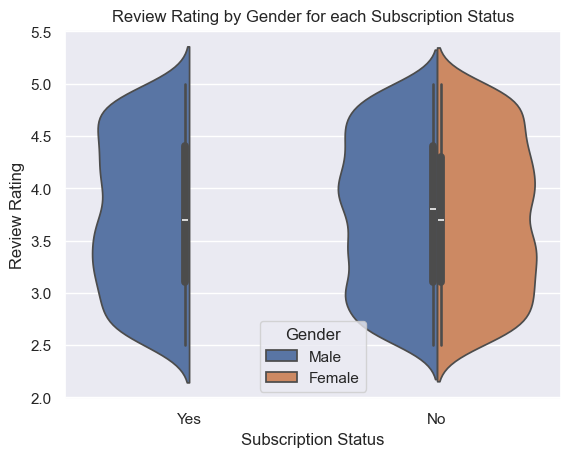

In [24]:
#  -------Question 8--------- #
sns.violinplot(
    x='Subscription Status',
    y='Review Rating',
    hue='Gender',
    data=df,
    split=True  
)

plt.title('Review Rating by Gender for each Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Review Rating')
plt.legend(title='Gender')
plt.show()


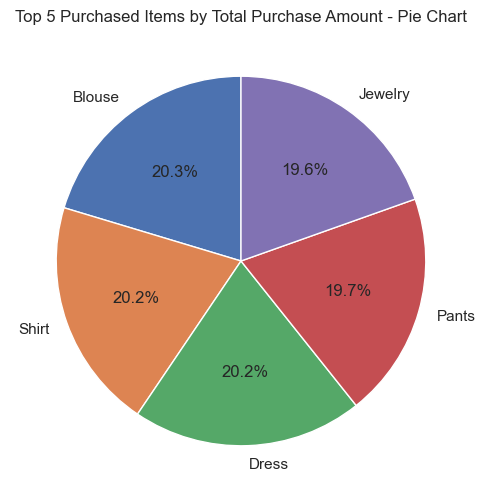

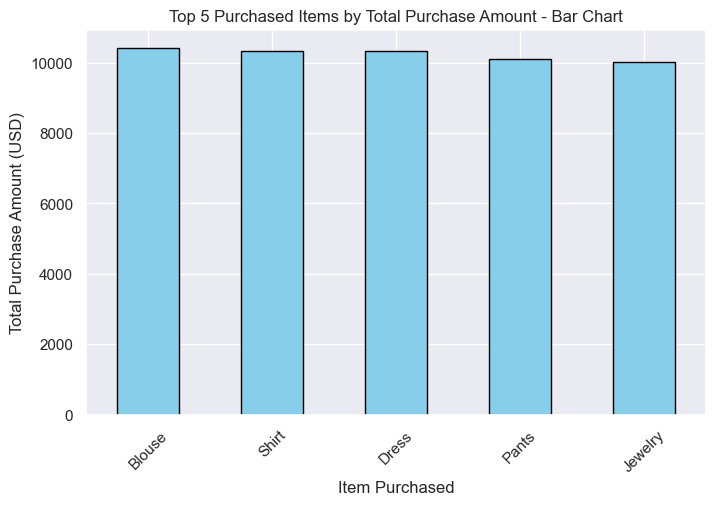

In [25]:
#  -------Question 9--------- #
import matplotlib.pyplot as plt

 
top_items = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6, 6))
plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Purchased Items by Total Purchase Amount - Pie Chart")
plt.show()

plt.figure(figsize=(8, 5))
top_items.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Purchased Items by Total Purchase Amount - Bar Chart")
plt.ylabel("Total Purchase Amount (USD)")
plt.xlabel("Item Purchased")
plt.xticks(rotation=45)
plt.show()


C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_13544\1525851251.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


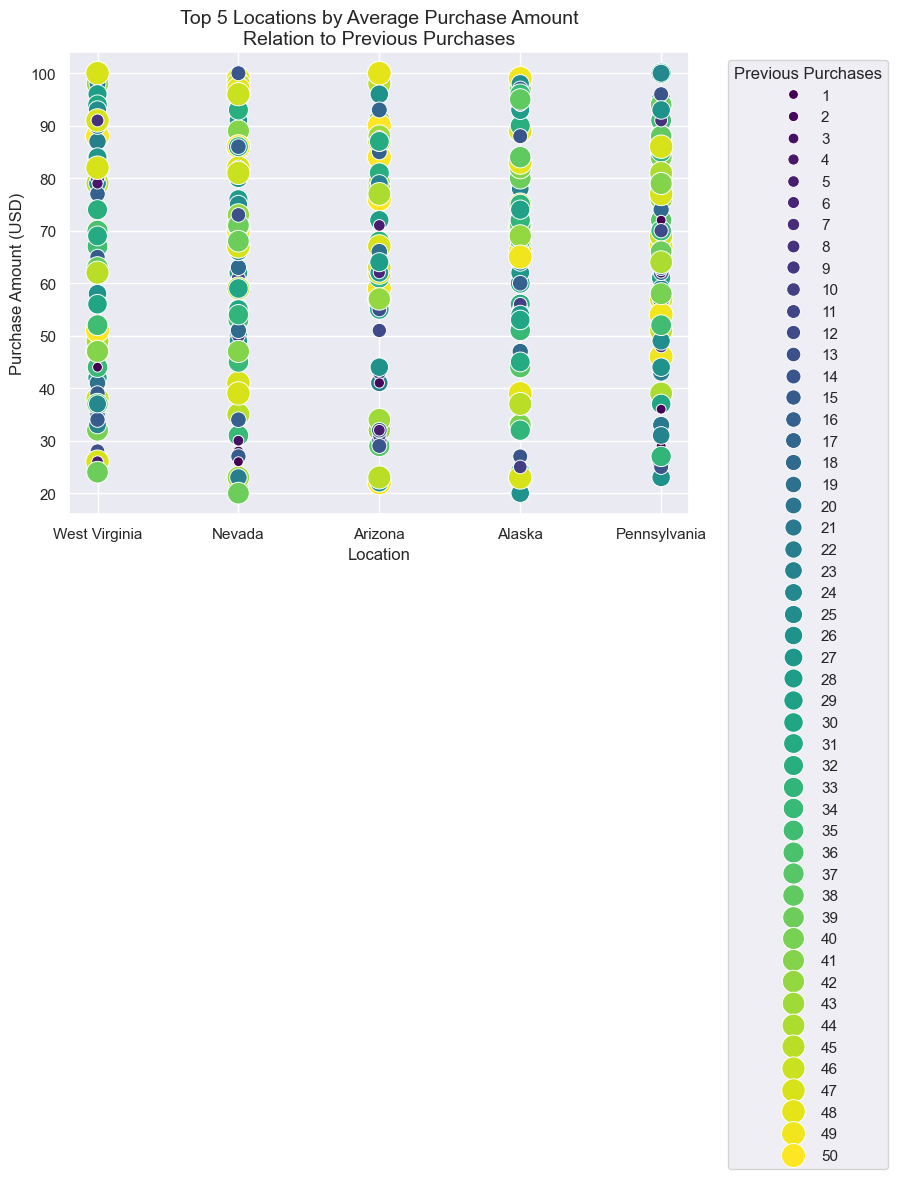

In [26]:
#  -------Question 10--------- #

avg_purchase = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

top5_locations = avg_purchase.sort_values(by='Purchase Amount (USD)', ascending=False).head(5)

top5_data = df[df['Location'].isin(top5_locations['Location'])]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=top5_data,
    x='Location',
    y='Purchase Amount (USD)',
    size='Previous Purchases',
    hue='Previous Purchases',
    palette='viridis',
    sizes=(50, 300),
    legend='full'
)

plt.title('Top 5 Locations by Average Purchase Amount\nRelation to Previous Purchases', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.legend(title='Previous Purchases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


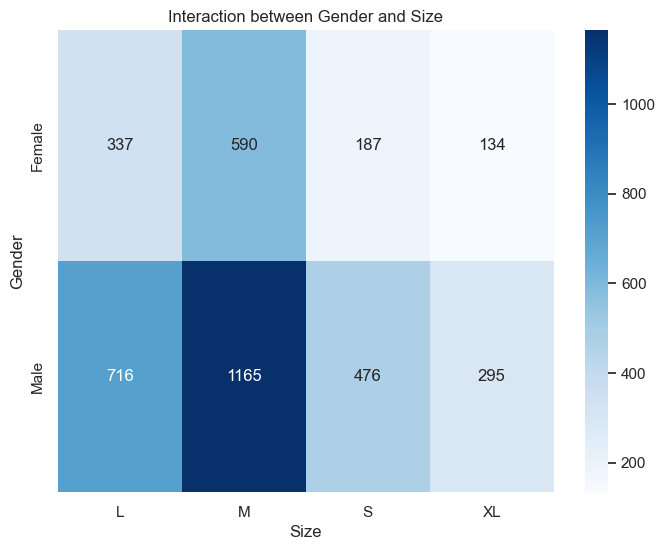

In [27]:
#  -------Question 11--------- #
ct = pd.crosstab(df['Gender'], df['Size'])

plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Interaction between Gender and Size')
plt.ylabel('Gender')
plt.xlabel('Size')
plt.show()


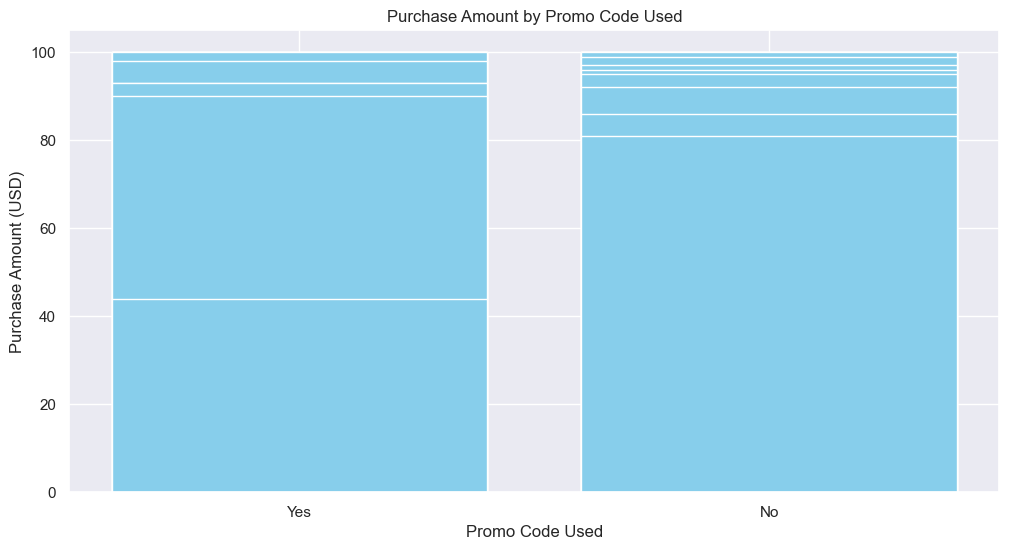

C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_13544\368051685.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo Code Used', data=df, palette='Set2')


Text(0.5, 1.0, 'Count of Promo Codes Used')

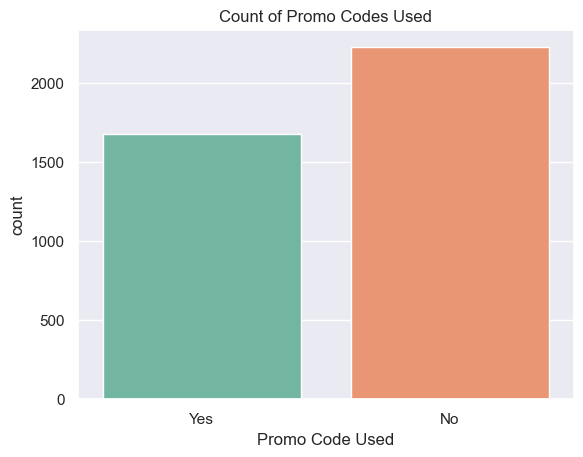

In [32]:
#  -------Question 12--------- #

plt.figure(figsize=(12, 6))
plt.bar(df['Promo Code Used'],df['Purchase Amount (USD)'], color='skyblue')
plt.title('Purchase Amount by Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show() 

sns.countplot(x='Promo Code Used', data=df, palette='Set2')
plt.title('Count of Promo Codes Used')




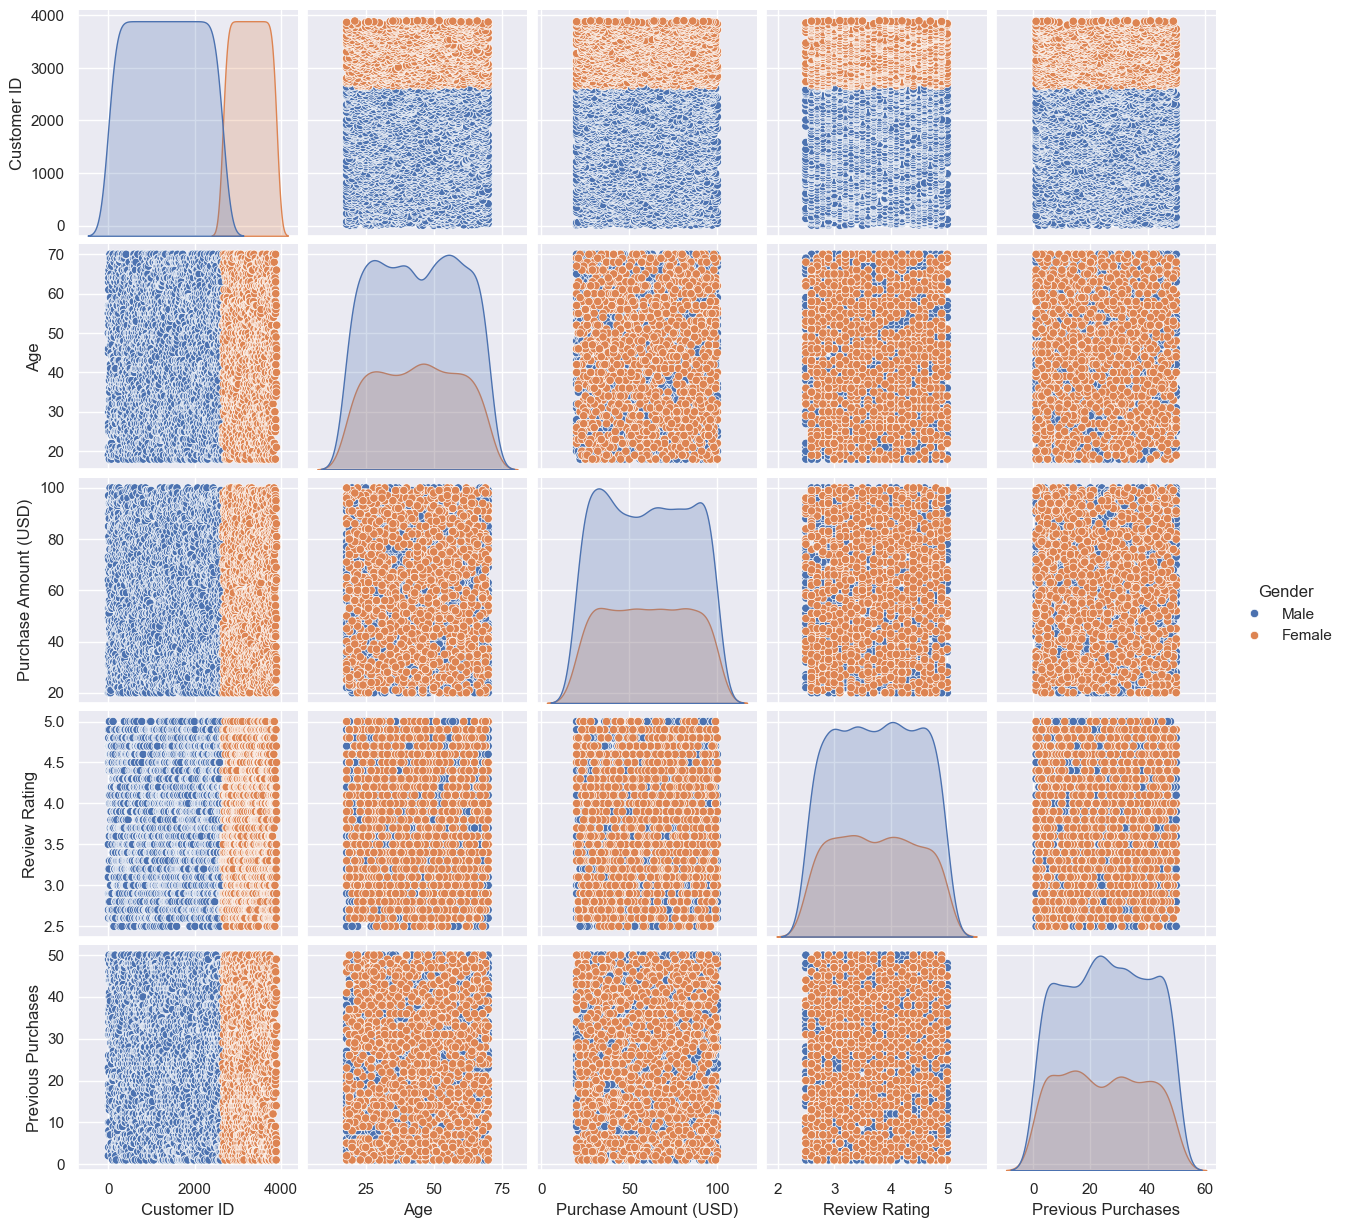

In [30]:
#  -------Question 13--------- #
sns.pairplot(df, hue="Gender")

plt.show()
